<a href="https://colab.research.google.com/github/Rtniewi/cwiertniewicz-DataScience/blob/main/HW5/project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

//*** Katrina Cwiertniewicz
//*** Introduction to Data Science IS1
//***10/6/2025
//*** Project 5: Problem 1 Python
###The purpose of this assignment is to demonstrate how we can use Naïve Bayes to clasify a response variable. This is to predict whether a wine is red or white based on if the wine has high or low alcohol or high or low sugar content.

# **Problem 1**

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [57]:
wine_contentDF  = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW5/wine_flag_all.csv");

wine_contentDF

,Type,Alcohol_flag,Sugar_flag
0,Red,High,High
1,Red,High,Low
2,Red,Low,High
3,Red,High,Low
4,Red,Low,Low
...,...,...,...
3340,White,High,High
3341,White,High,Low
3342,White,High,Low
3343,White,High,Low


**Test for presence of any missing attribute/target values and impute as necessary.**

In [58]:
wine_contentDF.isnull().sum()

,0
Type,0
Alcohol_flag,0
Sugar_flag,0


There are no missing attributes or target values.

**Encode all categoric attributes(e.g. label encoding or ordinal encoding, etc.)**

In [59]:
le = preprocessing.LabelEncoder()

# save the encoded dataframe here
encoded_wine_contentDF = pd.DataFrame()

# Encode  only the categoric or boolean attributes
for i in range(0, wine_contentDF.shape[1]):
    if wine_contentDF.dtypes[i]=='object' or wine_contentDF.dtypes[i]=='bool':
        encoded_wine_contentDF[wine_contentDF.columns[i]] = le.fit_transform(wine_contentDF[wine_contentDF.columns[i]])



print("-=========================")
print(wine_contentDF)
print("-=========================")
print(encoded_wine_contentDF)

-=========================
       Type Alcohol_flag Sugar_flag
0       Red         High       High
1       Red         High        Low
2       Red          Low       High
3       Red         High        Low
4       Red          Low        Low
...     ...          ...        ...
3340  White         High       High
3341  White         High        Low
3342  White         High        Low
3343  White         High        Low
3344  White         High        Low

[3345 rows x 3 columns]
-=========================
      Type  Alcohol_flag  Sugar_flag
0        0             0           0
1        0             0           1
2        0             1           0
3        0             0           1
4        0             1           1
...    ...           ...         ...
3340     1             0           0
3341     1             0           1
3342     1             0           1
3343     1             0           1
3344     1             0           1

[3345 rows x 3 columns]


/tmp/ipython-input-2193739632.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if wine_contentDF.dtypes[i]=='object' or wine_contentDF.dtypes[i]=='bool':
/tmp/ipython-input-2193739632.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if wine_contentDF.dtypes[i]=='object' or wine_contentDF.dtypes[i]=='bool':
/tmp/ipython-input-2193739632.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if wine_contentDF.dtypes[i]=='object' or

**Create contingency tables (cross tabulations) for:**

**a. Type vs. Alcohol Content**

In [60]:
# Cross tabulation of Type and Alcohol Content

p_crosstab_1 = pd.crosstab(wine_contentDF.Type, wine_contentDF.Alcohol_flag)

print(p_crosstab_1)


Alcohol_flag  High   Low
Type                    
Red            485   600
White         1176  1084


**b. Type vs. Sugar Content**

In [61]:
# Cross tabulation of Type and Sugar Content

p_crosstab_2 = pd.crosstab(wine_contentDF.Type, wine_contentDF.Sugar_flag)

print(p_crosstab_2)

Sugar_flag  High  Low
Type                 
Red          237  848
White       1382  878


**Plot the two cross tabulations obtained in Step 5**

**Alcohol Content and Type**

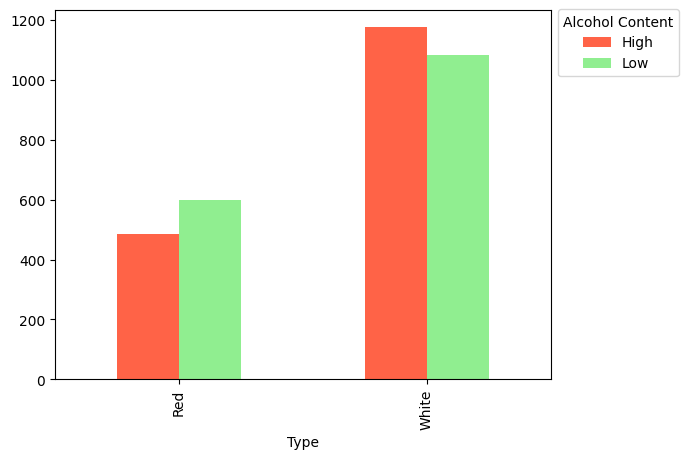

In [136]:
alcohol_type_table = p_crosstab_1.plot(kind="bar", stacked=False, color=['tomato','lightgreen'])
alcohol_type_table.legend(title='Alcohol Content', bbox_to_anchor=(1, 1.02), loc='upper left')

**Sugar Content and Type**

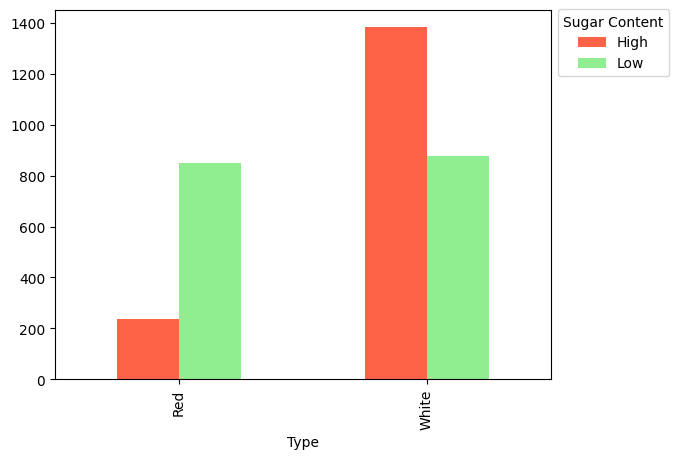

In [137]:
sugar_type_table = p_crosstab_2.plot(kind="bar", stacked=False, color=['tomato','lightgreen'])
sugar_type_table.legend(title='Sugar Content', bbox_to_anchor=(1, 1.02), loc='upper left')

**Alcohol Content, Sugar Content, and Type**

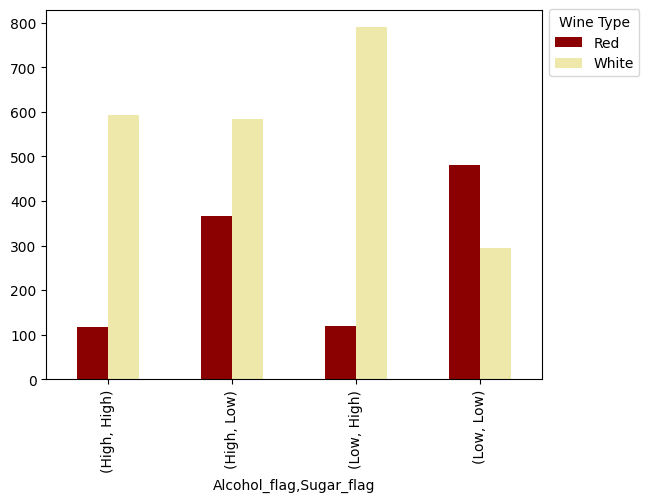

In [130]:
alcohol_sugar_type_table = pd.crosstab([wine_contentDF.Alcohol_flag, wine_contentDF.Sugar_flag], wine_contentDF.Type, margins=False)

ax = alcohol_sugar_type_table.plot(kind="bar", stacked=False, color=['darkred','palegoldenrod'])
ax.legend(title='Wine Type', bbox_to_anchor=(1, 1.02), loc='upper left')


**Use the tables from the previous step to calculate:**

**a. The prior probability of Type = Red and Type = White.**

In [102]:
red_prior_prob = p_crosstab_1.loc['Red'].sum()/p_crosstab_1.values.sum()
white_prior_prob = p_crosstab_1.loc['White'].sum()/p_crosstab_1.values.sum()

print("Prior Probability of Type=Red", red_prior_prob)
print("Prior Probability of Type=White", white_prior_prob)

Prior Probability of Type=Red 0.3243647234678625
Prior Probability of Type=White 0.6756352765321375


**b. The probability of high and low alcohol content.**

In [107]:
high_alcohol_prob = p_crosstab_1['High'].sum()/p_crosstab_1.values.sum()
low_alcohol_prob = p_crosstab_1['Low'].sum()/p_crosstab_1.values.sum()

print("Probability of High", high_alcohol_prob)
print("Probability of Low", low_alcohol_prob)

Probability of High 0.49656203288490286
Probability of Low 0.5034379671150971


**c. The probability of high and low sugar content.**

In [122]:
high_sugar_prob = p_crosstab_2['High'].sum()/p_crosstab_2.values.sum()
low_sugar_prob = p_crosstab_2['Low'].sum()/p_crosstab_2.values.sum()

print("Probability of High", high_sugar_prob)
print("Probability of Low", low_sugar_prob)

Probability of High 0.48400597907324366
Probability of Low 0.5159940209267564


**d. The conditional probabilities p(Alcohol_flag = High | Type = Red).and p(Alcohol_flag = Low | Type = Red)**

In [138]:
high_alcohol_cond_prob = p_crosstab_1.loc['Red','High']/p_crosstab_1.loc['Red'].sum()
low_alcohol_cond_prob = p_crosstab_1.loc['Red','Low']/p_crosstab_1.loc['Red'].sum()

print("Conditional Probabiltiy of Red with High Alcohol Content", high_alcohol_cond_prob)
print("Conditional Probabiltiy of Red with Low Alcohol Content", low_alcohol_cond_prob)

Conditional Probabiltiy of Red with High Alcohol Content 0.4470046082949309
Conditional Probabiltiy of Red with Low Alcohol Content 0.5529953917050692


**e. The conditional probabilities p(Sugar_flag = High | Type = Red).and p(Sugar_flag = Low | Type = Red)**

In [120]:
high_sugar_cond_prob = p_crosstab_2.loc['Red','High']/p_crosstab_2.loc['Red'].sum()
low_sugar_cond_prob = p_crosstab_2.loc['Red','Low']/p_crosstab_2.loc['Red'].sum()

print("Conditional Probabiltiy of Red with High Sugar Content", high_sugar_cond_prob)
print("Conditional Probabiltiy of Red with Low Sugar Content", low_sugar_cond_prob)

Conditional Probabiltiy of Red with High Sugar Content 0.2184331797235023
Conditional Probabiltiy of Red with Low Sugar Content 0.7815668202764977


**Create appropriate NB classifier and record their accuracy on various training/test ratios, e.g., 80-20, 75-25, 70-30, 60-40, 50-50. Be sure to shuffle and stratify the data sets.**

**80-20**

In [66]:
NBmodel1 = GaussianNB()

# Prepare input and output for learning
X = encoded_wine_contentDF.iloc[:,1:3]
y = encoded_wine_contentDF.iloc[:,0]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.20, stratify=y)

# Display the sets
print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
2688             0           1
1824             1           0
2483             0           0
935              1           1
2017             1           0
...            ...         ...
2650             0           1
2246             1           1
3001             0           1
11               1           1
2854             0           1

[2676 rows x 2 columns]
      Alcohol_flag  Sugar_flag
288              0           1
3047             0           1
2197             1           1
3132             0           0
682              1           0
...            ...         ...
864              0           1
2505             0           0
232              1           1
2467             0           0
2634             0           0

[669 rows x 2 columns]


In [67]:
# Train the model
NBmodel1.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores1 = [NBmodel1.score(X_train, y_train), NBmodel1.score(X_test, y_test)]

**75-25**

In [68]:
NBmodel2 = GaussianNB()

# Prepare input and output for learning
X = encoded_wine_contentDF.iloc[:,1:3]
y = encoded_wine_contentDF.iloc[:,0]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.25, stratify=y)

# Display the sets
print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
1184             1           0
2433             1           0
2765             0           1
2217             1           1
1555             0           0
...            ...         ...
2017             1           0
3106             0           1
2428             1           0
11               1           1
2343             1           1

[2508 rows x 2 columns]
      Alcohol_flag  Sugar_flag
2253             1           0
2797             0           0
1005             1           1
3264             0           0
463              1           1
...            ...         ...
540              0           0
855              0           1
1862             1           0
1619             1           0
1719             1           0

[837 rows x 2 columns]


In [69]:
# Train the model
NBmodel2.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores2 = [NBmodel2.score(X_train, y_train), NBmodel2.score(X_test, y_test)]

**70-30**

In [70]:
NBmodel3 = GaussianNB()

# Prepare input and output for learning
X = encoded_wine_contentDF.iloc[:,1:3]
y = encoded_wine_contentDF.iloc[:,0]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.30, stratify=y)

# Display the sets
print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
1768             1           0
1792             1           1
413              1           0
1610             1           0
1671             1           0
...            ...         ...
522              1           0
893              1           0
1924             1           1
11               1           1
1868             1           1

[2341 rows x 2 columns]
      Alcohol_flag  Sugar_flag
1389             0           0
1899             1           0
162              1           1
1889             1           0
2982             0           0
...            ...         ...
941              0           0
3223             0           0
3219             0           1
2221             1           0
205              0           0

[1004 rows x 2 columns]


In [71]:
# Train the model
NBmodel3.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores3 = [NBmodel3.score(X_train, y_train), NBmodel3.score(X_test, y_test)]

**60-40**

In [72]:
NBmodel4 = GaussianNB()

# Prepare input and output for learning
X = encoded_wine_contentDF.iloc[:,1:3]
y = encoded_wine_contentDF.iloc[:,0]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.40, stratify=y)

# Display the sets
print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
3188             0           1
1192             1           0
1152             1           1
1741             1           0
1308             1           1
...            ...         ...
3203             0           1
1129             1           1
11               1           1
2226             1           0
2437             0           1

[2007 rows x 2 columns]
      Alcohol_flag  Sugar_flag
1326             0           1
520              1           1
443              0           1
1721             1           1
2826             0           1
...            ...         ...
744              1           0
3184             0           1
1430             0           1
2986             0           0
1062             1           1

[1338 rows x 2 columns]


In [73]:
# Train the model
NBmodel4.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores4 = [NBmodel4.score(X_train, y_train), NBmodel4.score(X_test, y_test)]

**50-50**

In [74]:
NBmodel5 = GaussianNB()

# Prepare input and output for learning
X = encoded_wine_contentDF.iloc[:,1:3]
y = encoded_wine_contentDF.iloc[:,0]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.50, stratify=y)

# Display the sets
print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
1097             1           1
3003             0           0
1341             0           0
1685             1           0
708              0           0
...            ...         ...
1803             1           1
3297             0           0
1129             1           1
580              0           1
770              1           1

[1672 rows x 2 columns]
      Alcohol_flag  Sugar_flag
348              0           1
1435             0           0
1475             0           0
3212             0           0
1269             1           1
...            ...         ...
2899             0           1
2773             0           1
2584             0           0
1219             1           1
621              0           0

[1673 rows x 2 columns]


In [75]:
# Train the model
NBmodel5.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores5 = [NBmodel5.score(X_train, y_train), NBmodel5.score(X_test, y_test)]

**Plot the model accuracy measures obtained in Step 8**

**80-20**

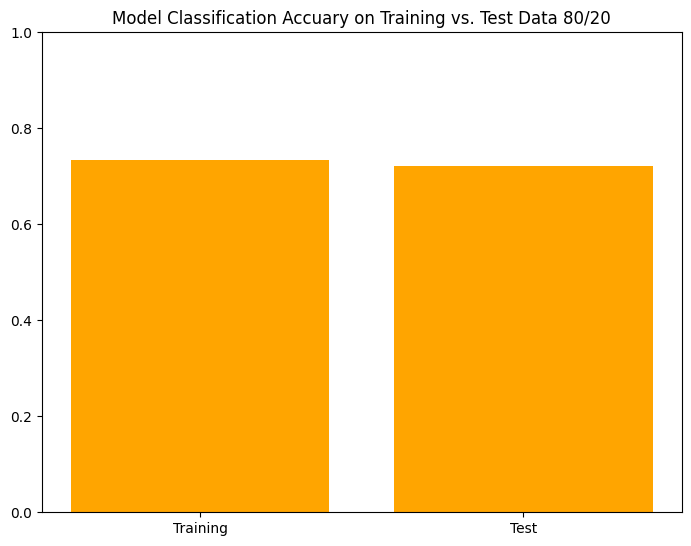

In [76]:
# Plot the accuracy values
fig1 = plt.figure()
ax1 = fig1.add_axes([0,0,1,1])
ax1.set_title('Model Classification Accuary on Training vs. Test Data 80/20')
ax1.bar(labels, scores1, color="orange")
ax1.set_ylim(0, 1)
plt.show()

**75-25**

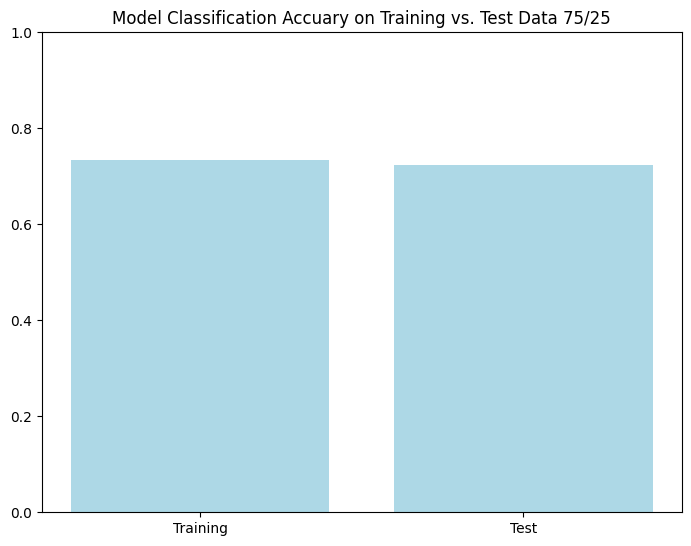

In [89]:
# Plot the accuracy values
fig2 = plt.figure()
ax2 = fig2.add_axes([0,0,1,1])
ax2.set_title('Model Classification Accuary on Training vs. Test Data 75/25')
ax2.bar(labels, scores2, color="lightblue")
ax2.set_ylim(0, 1)
plt.show()

**70-30**

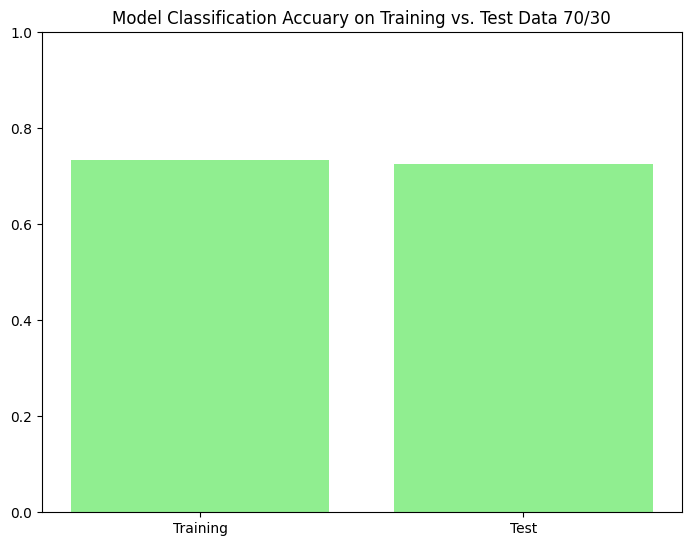

In [85]:
# Plot the accuracy values
fig3 = plt.figure()
ax3 = fig3.add_axes([0,0,1,1])
ax3.set_title('Model Classification Accuary on Training vs. Test Data 70/30')
ax3.bar(labels, scores3, color="lightgreen")
ax3.set_ylim(0, 1)
plt.show()

**60-40**

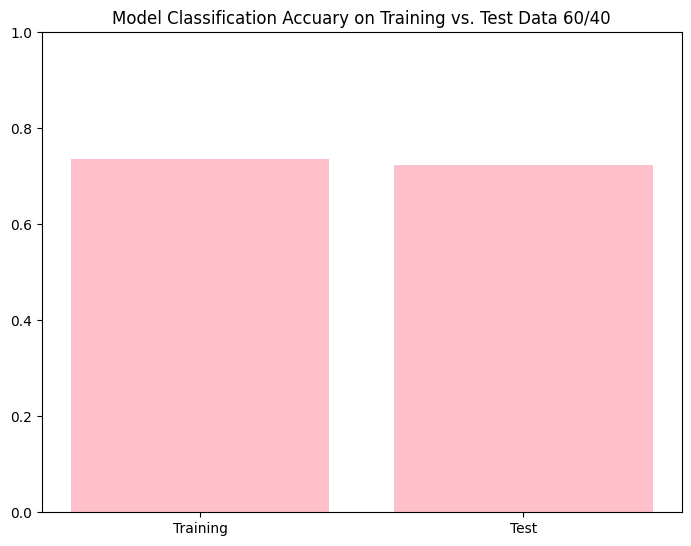

In [87]:
# Plot the accuracy values
fig4 = plt.figure()
ax4 = fig4.add_axes([0,0,1,1])
ax4.set_title('Model Classification Accuary on Training vs. Test Data 60/40')
ax4.bar(labels, scores4, color="pink")
ax4.set_ylim(0, 1)
plt.show()

**50-50**

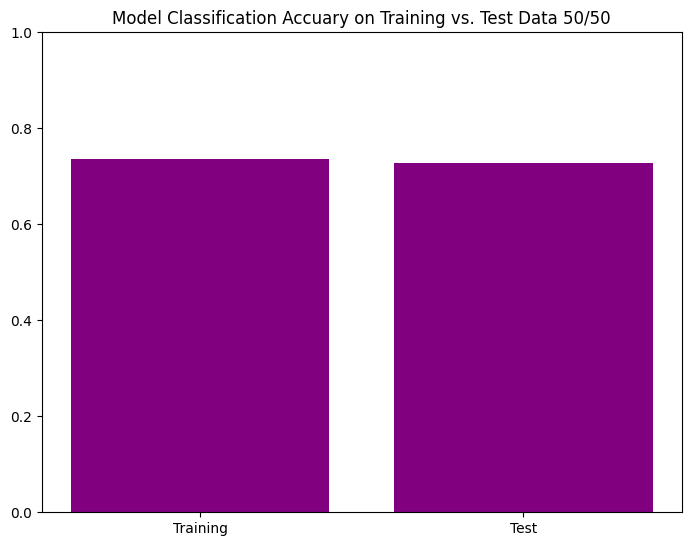

In [88]:
# Plot the accuracy values
fig5 = plt.figure()
ax5 = fig5.add_axes([0,0,1,1])
ax5.set_title('Model Classification Accuary on Training vs. Test Data 50/50')
ax5.bar(labels, scores5, color="purple")
ax5.set_ylim(0, 1)
plt.show()

All Training Scores

In [93]:
print("80-20 split:", scores1)
print("75-25 split:", scores2)
print("70-30 split:", scores3)
print("60-40 split:", scores4)
print("50-50 split:", scores5)

80-20 split: [0.734304932735426, 0.7204783258594918]
75-25 split: [0.7344497607655502, 0.7228195937873357]
70-30 split: [0.7338744126441692, 0.7260956175298805]
60-40 split: [0.7364225211758844, 0.7242152466367713]
50-50 split: [0.7350478468899522, 0.7280334728033473]


**Summarize your findings.**

Almost 70% of the wines from this data are white wines. This is also noticeable in the plotting of the Sugar and Alcohol contingency tables. This may affect the data during the training, as the model might be better at identifying white wines over red wines.

Low Alcohol and High Sugar whites and Low Alcohol and Low Sugar reds are the most common types in this dataset. The Sugar and Alcohol content is split almost 50-50 for low and high content wines in this dataset.

The conditional probability for Red is the most important when studying the Sugar content. If a wine has a low sugar content, it has a 78% chance of being red.

The models are training and testing well on the data. The numbers for testing and training are very similar, which tells us that the model is able to test on data it hasn't seen before with very similar accuracy to the training.

The different splits for training and testing didn't show much variation, as the numbers stayed around 73 and 72. This shows that the model only changes slightly when splitting the data differently.

From this data, training and testing changed very little and are fairly accurate with 72% accuracy. This is because the data set is small and has only alcohol and sugar variables to analyze. If there were a larger model with more variables, we would most likely see more discrepancies between the different splits of data.